In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('taylor_swift_lyrics.csv', encoding='latin-1')

In [5]:
df.head() # each row represents one line of lyrics
# columns: (id,) artist, album, track_title, track_n, lyric, line, year

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [7]:
songs = df.groupby('track_title').agg({'lyric': lambda x: ' '.join(x), 
                                       'year': 'mean'}).reset_index()

In [12]:
pd.options.display.max_colwidth = 5000
songs.head()

,track_title,lyric,year
0,...Ready for It?,"Knew he was a killer first time that I saw him Wondered how many girls he had loved and left haunted But if he's a ghost, then I can be a phantom Holdin' him for ransom, some Some boys are tryin' too hard, he don't try at all though Younger than my exes, but he act like such a man, so I see nothing better, I keep him forever Like a vendetta-ta I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Knew I was a robber first time that he saw me Stealing hearts and running off and never sayin' sorry But if I'm a thief, then he can join the heist, and We'll move to an island, and And he can be my jailer, Burton to this Taylor Every love I've known in comparison is a failure I forget their names now, I'm so very tame now Never be the same now, now I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know (no one has to know) In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Oh, are you ready for it? Baby, let the games begin Let the games begin Let the games begin Baby, let the games begin Let the games begin Let the games begin I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time In the middle of the night Baby, let the games begin Let the games begin Let the games begin Are you ready for it? Baby, let the games begin Let the games begin Let the games begin Are you ready for it?",2017
1,22,"It feels like a perfect night to dress up like hipsters And make fun of our exes, uh uh, uh uh It feels like a perfect night for breakfast at midnight To fall in love with strangers, uh uh, uh uh Yeah We're happy, free, confused, and lonely at the same time It's miserable and magical, oh yeah Tonight's the night when we forget about the deadlines It's time, uh uh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 It seems like one of those nights This place is too crowded, too many cool kids, uh uh, uh uh (Who's Taylor Swift, anyway? Ew) It seems like one of those nights We ditch the whole scene and end up dreaming Instead of sleeping Yeah We're happy, free, confused, and lonely in the best way It's miserable and magical, oh yeah Tonight's the night when we forget about The heartbreaks, it's time Oh oh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 I don't know about you 22, 22 It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, I gotta have you I gotta have you I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 Dancing like 22, yeah, 22, yeah yeah It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, I gotta have you I gotta have you",2012
2,A Perfectly Good Heart,"Why would you wanna break a perfectly 

In [11]:
len(songs)

94

In [ ]:
# tf-idf term frequency-inverse document frequency:
# idf: look at the whole corpus, and if a word occurs really frequently, we penalize it

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
import nltk
from nltk.corpus import stopwords

In [29]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['back','said','come','things','get','oh','one','yeah','place','would','like','know','stay','go','let','cause']
)

[nltk_data] Downloading package stopwords to /Users/coral/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
vectorizer = TfidfVectorizer(stop_words = stop_words, min_df = 0)

In [31]:
tfidf = vectorizer.fit_transform(songs['lyric'])

In [32]:
from sklearn.decomposition import NMF

In [33]:
nmf = NMF(n_components = 6)

In [34]:
topic_values = nmf.fit_transform(tfidf)

In [35]:
# find out what words NMF chose for our topics
for topic_num, topic in enumerate(nmf.components_): 
    message = "Topic #{}: ".format(topic_num + 1) 
    message += " ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: time think want sorry last see could better never baby
Topic #2: wanna dance good york first perfectly game break new help
Topic #3: love beautiful way feel good bad never lights silence light
Topic #4: girl goes uh everybody trying lucky knows works got tell
Topic #5: ooh made whoa starlight waiting ever look soul body together
Topic #6: la superman fifteen watch day fly beautiful away save forget


In [37]:
# I am not entirely sure about these, tbh
topic_labels = ['regret', 'celebration', 'love', 'hard_work', 'memories', 'escape']

In [39]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)
df_topics.head()

,regret,celebration,love,hard_work,memories,escape
0,0.131115,0.000000,0.043845,0.000000,0.000000,0.000000
1,0.006968,0.008703,0.012735,0.225842,0.006771,0.000000
2,0.000000,0.623045,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.639392,0.000000,0.014318
4,0.188634,0.024992,0.000000,0.060864,0.000000,0.001923


In [40]:
songs = songs.join(df_topics)
songs.head()

,track_title,lyric,year,regret,celebration,love,hard_work,memories,escape
0,...Ready for It?,"Knew he was a killer first time that I saw him Wondered how many girls he had loved and left haunted But if he's a ghost, then I can be a phantom Holdin' him for ransom, some Some boys are tryin' too hard, he don't try at all though Younger than my exes, but he act like such a man, so I see nothing better, I keep him forever Like a vendetta-ta I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Knew I was a robber first time that he saw me Stealing hearts and running off and never sayin' sorry But if I'm a thief, then he can join the heist, and We'll move to an island, and And he can be my jailer, Burton to this Taylor Every love I've known in comparison is a failure I forget their names now, I'm so very tame now Never be the same now, now I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know (no one has to know) In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Oh, are you ready for it? Baby, let the games begin Let the games begin Let the games begin Baby, let the games begin Let the games begin Let the games begin I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time In the middle of the night Baby, let the games begin Let the games begin Let the games begin Are you ready for it? Baby, let the games begin Let the games begin Let the games begin Are you ready for it?",2017,0.131115,0.000000,0.043845,0.000000,0.000000,0.000000
1,22,"It feels like a perfect night to dress up like hipsters And make fun of our exes, uh uh, uh uh It feels like a perfect night for breakfast at midnight To fall in love with strangers, uh uh, uh uh Yeah We're happy, free, confused, and lonely at the same time It's miserable and magical, oh yeah Tonight's the night when we forget about the deadlines It's time, uh uh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 It seems like one of those nights This place is too crowded, too many cool kids, uh uh, uh uh (Who's Taylor Swift, anyway? Ew) It seems like one of those nights We ditch the whole scene and end up dreaming Instead of sleeping Yeah We're happy, free, confused, and lonely in the best way It's miserable and magical, oh yeah Tonight's the night when we forget about The heartbreaks, it's time Oh oh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 I don't know about you 22, 22 It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, I gotta have you I gotta have you I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 Dancing like 22, yeah, 22, yeah yeah It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, 

In [44]:
# setting whether or not a topic is present in a song, with a threshold of .1
for label in topic_labels:
    songs.loc[songs[label] >= .1, label] = 1
    songs.loc[songs[label] < .1, label] = 0

In [45]:
songs.head()

,track_title,lyric,year,regret,celebration,love,hard_work,memories,escape
0,...Ready for It?,"Knew he was a killer first time that I saw him Wondered how many girls he had loved and left haunted But if he's a ghost, then I can be a phantom Holdin' him for ransom, some Some boys are tryin' too hard, he don't try at all though Younger than my exes, but he act like such a man, so I see nothing better, I keep him forever Like a vendetta-ta I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Knew I was a robber first time that he saw me Stealing hearts and running off and never sayin' sorry But if I'm a thief, then he can join the heist, and We'll move to an island, and And he can be my jailer, Burton to this Taylor Every love I've known in comparison is a failure I forget their names now, I'm so very tame now Never be the same now, now I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know (no one has to know) In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Oh, are you ready for it? Baby, let the games begin Let the games begin Let the games begin Baby, let the games begin Let the games begin Let the games begin I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time In the middle of the night Baby, let the games begin Let the games begin Let the games begin Are you ready for it? Baby, let the games begin Let the games begin Let the games begin Are you ready for it?",2017,1.0,0.0,0.0,0.0,0.0,0.0
1,22,"It feels like a perfect night to dress up like hipsters And make fun of our exes, uh uh, uh uh It feels like a perfect night for breakfast at midnight To fall in love with strangers, uh uh, uh uh Yeah We're happy, free, confused, and lonely at the same time It's miserable and magical, oh yeah Tonight's the night when we forget about the deadlines It's time, uh uh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 It seems like one of those nights This place is too crowded, too many cool kids, uh uh, uh uh (Who's Taylor Swift, anyway? Ew) It seems like one of those nights We ditch the whole scene and end up dreaming Instead of sleeping Yeah We're happy, free, confused, and lonely in the best way It's miserable and magical, oh yeah Tonight's the night when we forget about The heartbreaks, it's time Oh oh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 I don't know about you 22, 22 It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, I gotta have you I gotta have you I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 Dancing like 22, yeah, 22, yeah yeah It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, I gotta have you I gotta have 

In [47]:
# we're looking at change over time so
year_topics = songs.groupby('year').sum().reset_index()
year_topics

,year,regret,celebration,love,hard_work,memories,escape
0,2006,5.0,2.0,5.0,3.0,0.0,2.0
1,2008,7.0,2.0,4.0,0.0,0.0,2.0
2,2010,10.0,0.0,5.0,2.0,2.0,3.0
3,2012,7.0,2.0,2.0,4.0,2.0,0.0
4,2014,3.0,1.0,5.0,2.0,2.0,0.0
5,2017,5.0,2.0,4.0,1.0,3.0,0.0


In [48]:
import matplotlib.pyplot as plt

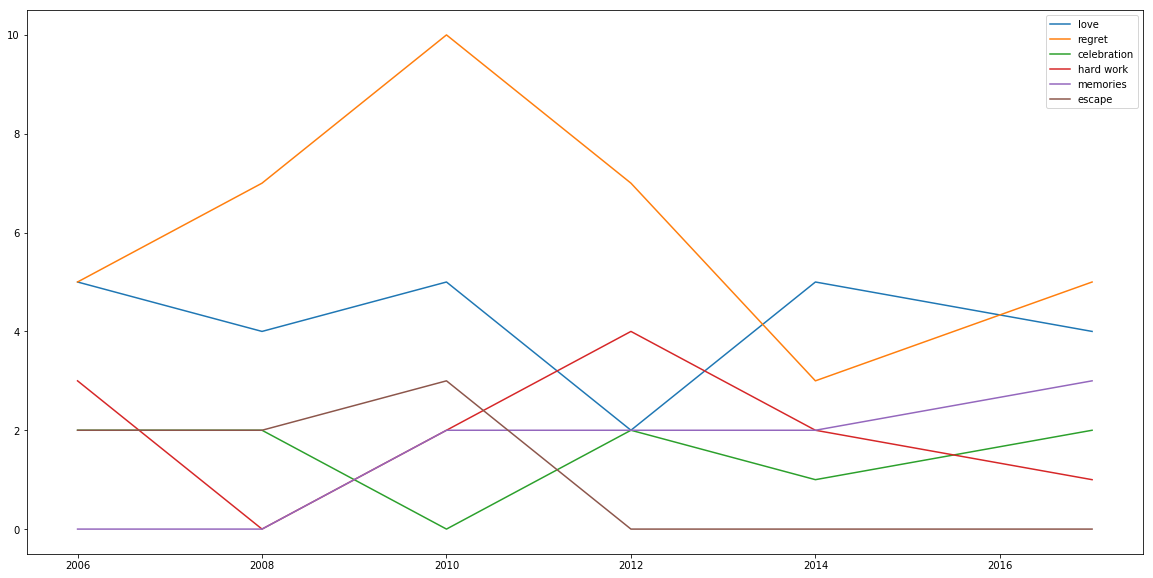

In [50]:
plt.figure(figsize = (20,10))
plt.plot(year_topics['year'], year_topics['love'], label='love')
plt.plot(year_topics['year'], year_topics['regret'], label='regret')
plt.plot(year_topics['year'], year_topics['celebration'], label='celebration')
plt.plot(year_topics['year'], year_topics['hard_work'], label='hard work')
plt.plot(year_topics['year'], year_topics['memories'], label='memories')
plt.plot(year_topics['year'], year_topics['escape'], label='escape')
plt.legend()